In [52]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from tensorflow.keras.layers import LSTM
from keras.layers import Conv2D, MaxPooling2D,Conv1D,MaxPooling1D
from keras.layers import Dense, Dropout, Activation, Flatten

In [2]:

# load dataset
train = pd.read_csv("train.csv", index_col = 0)
test = pd.read_csv("test.csv", index_col = 0)



In [3]:
train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
       'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'agenum_random',
       'ctnum_random', 'batch_A', 'batch_B', 'batch_C', 'batch_D', 'batch_E',
       'batch_F', 'batch_G', 'batch_H', 'batch_I', 'batch_J', 'batch_K',
       'batch_L', 'batch_M', 'batch_N', 'batch_O', 'batch_P', 'batch_Q',
       'batch_R', 'batch_S', 'batch_T', 'batch_U', 'ctnum_median_status',
       'infection'],
      dtype='object')

In [4]:
test.columns


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50',
       'agenum_random', 'ctnum_random', 'batch_A', 'batch_B', 'batch_C',
       'batch_E', 'batch_F', 'batch_G', 'batch_H', 'batch_I', 'batch_J',
       'batch_K', 'batch_L', 'batch_M', 'batch_N', 'batch_O', 'batch_P',
       'batch_Q', 'batch_R', 'batch_S', 'batch_T', 'batch_U',
       'ctnum_median_status', 'infection'],
      dtype='object')

In [5]:
X_train = train.drop(['batch_N', 'batch_O', 'batch_P', 'batch_Q',
       'batch_R', 'batch_S', 'batch_T','batch_H', 'batch_I', 'batch_J', 'batch_K',
       'batch_L', 'batch_M', 'batch_N','infection','batch_D'], axis = 1)

In [6]:
X_test = test.drop(['batch_N', 'batch_O', 'batch_P', 'batch_Q',
       'batch_R', 'batch_S', 'batch_T','batch_H', 'batch_I', 'batch_J', 'batch_K',
       'batch_L', 'batch_M', 'batch_N','infection','V19'], axis = 1)

In [7]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
       'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'agenum_random',
       'ctnum_random', 'batch_A', 'batch_B', 'batch_C', 'batch_E', 'batch_F',
       'batch_G', 'batch_U', 'ctnum_median_status'],
      dtype='object')

In [8]:
X_test.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
       'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'agenum_random',
       'ctnum_random', 'batch_A', 'batch_B', 'batch_C', 'batch_E', 'batch_F',
       'batch_G', 'batch_U', 'ctnum_median_status'],
      dtype='object')

In [9]:
y_train = train['infection']

In [10]:
y_train

0      1
1      1
2      1
3      1
4      1
      ..
647    0
648    0
649    0
650    0
651    0
Name: infection, Length: 652, dtype: int64

In [11]:
y_test = test['infection']

In [12]:
y_test

418    1
474    0
181    1
446    0
297    1
      ..
31     1
113    1
272    1
311    1
395    1
Name: infection, Length: 121, dtype: int64

In [13]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((652, 59), (652,), (121, 59), (121,))

In [14]:
model = Sequential()
model.add(Dense(60, input_shape=(59,), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

2022-11-07 14:26:18.508757: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-07 14:26:18.508883: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-11-07 14:26:18.508947: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-11-07 14:26:18.509007: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2022-11-07 14:26:18.509063: W tensorflow/stream_executor/platform/default/dso_loader.cc:64

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 1s 18ms/step - loss: 0.6452 - accuracy: 0.6564 - val_loss: 0.7115 - val_accuracy: 0.5191
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6066 - accuracy: 0.7025 - val_loss: 1.1151 - val_accuracy: 0.1832
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 0.5766 - accuracy: 0.7294 - val_loss: 0.8745 - val_accuracy: 0.3053
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 0.5361 - accuracy: 0.7543 - val_loss: 0.8228 - val_accuracy: 0.3817
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4805 - accuracy: 0.8100 - val_loss: 0.5617 - val_accuracy: 0.7786
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4618 - accuracy: 0.7908 - val_loss: 0.9401 - val_accuracy: 0.4275
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4181 - accuracy: 0.8100 - val_loss: 0.5601 - val_accuracy: 0.7557
Epoch 8/100


Epoch 59/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0316 - accuracy: 0.9942 - val_loss: 0.0953 - val_accuracy: 0.9771
Epoch 60/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0265 - accuracy: 0.9942 - val_loss: 0.0341 - val_accuracy: 1.0000
Epoch 61/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0223 - accuracy: 0.9962 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 62/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0349 - accuracy: 0.9923 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 63/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0248 - accuracy: 0.9981 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 64/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0458 - accuracy: 0.9827 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 65/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0244 - accuracy: 0.9981 - val_loss: 0.0235 - val_accuracy: 1.0000
Epoch 

In [17]:
len(history.history['accuracy'])

100

In [18]:
y_pred_prob = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [19]:
y_pred = np.array([ 1 if i > 0.5 else 0 for i in y_pred_prob]) 

In [20]:
y_pred_prob

array([[7.54514098e-01],
       [1.78175469e-04],
       [9.99997020e-01],
       [9.97675088e-05],
       [1.00000000e+00],
       [9.99977827e-01],
       [9.99608874e-01],
       [9.99998033e-01],
       [7.21617607e-06],
       [4.31470096e-01],
       [9.99998629e-01],
       [9.99989927e-01],
       [2.46435549e-04],
       [9.99999881e-01],
       [9.99999702e-01],
       [9.99998927e-01],
       [9.99783397e-01],
       [9.99999881e-01],
       [9.99377012e-01],
       [9.99999881e-01],
       [1.00000000e+00],
       [9.12891919e-05],
       [8.44632983e-01],
       [9.01222156e-05],
       [9.99958277e-01],
       [9.84535754e-01],
       [6.10989111e-04],
       [3.93148330e-05],
       [9.99999166e-01],
       [9.99999762e-01],
       [9.99999821e-01],
       [1.15307164e-04],
       [2.85229692e-03],
       [9.99999344e-01],
       [9.99999881e-01],
       [9.99999523e-01],
       [9.99999523e-01],
       [9.99999702e-01],
       [9.99996006e-01],
       [9.99997854e-01],


In [21]:
from sklearn.metrics import *

In [22]:
accuracy_score(y_true = y_test, y_pred = y_pred)

0.9669421487603306

In [23]:
confusion_matrix(y_true = y_test, y_pred = y_pred)

array([[ 16,   1],
       [  3, 101]])

In [24]:
f1score = f1_score(y_true = y_test, y_pred = y_pred)

In [25]:
recall = recall_score(y_true = y_test, y_pred = y_pred)

In [28]:
precision

'%r'

In [29]:
precision = precision_score(y_test,y_pred)

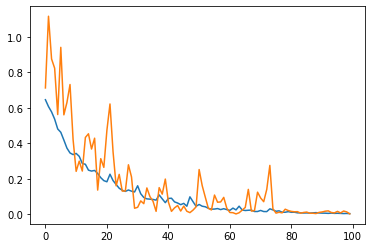

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

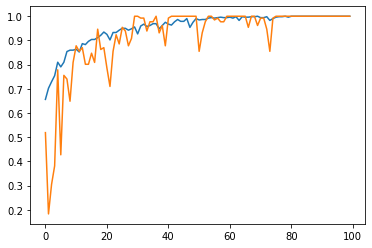

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [32]:
auc = roc_auc_score(y_test, y_pred_prob)

In [33]:
auc

0.9971719457013575

In [34]:
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, y_pred_prob)

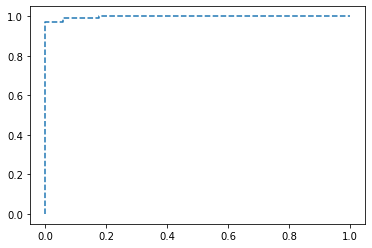

In [35]:
plt.plot(mlp_fpr, mlp_tpr, linestyle='--', label='MLP prediction (AUROC = %0.3f)' % auc)

In [36]:
#Precision Recall Curve

In [37]:
mlp_precision, mlp_recall, _ = precision_recall_curve(y_test, y_pred_prob)

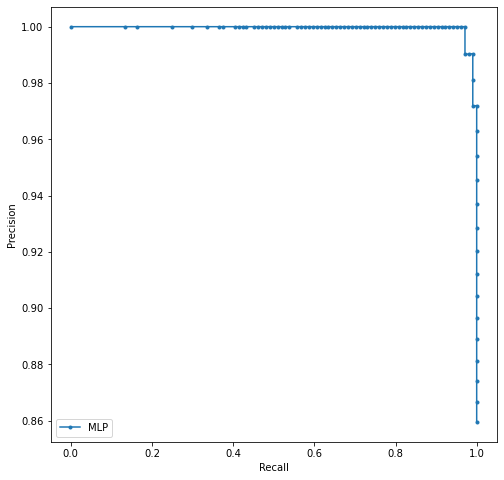

In [38]:
plt.figure(figsize=(8,8))
plt.plot(mlp_recall, mlp_precision, marker='.', label='MLP')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [40]:
X_train.shape[1]

59

In [55]:
X_train_reg = train.drop(['batch_N', 'batch_O', 'batch_P', 'batch_Q',
       'batch_R', 'batch_S', 'batch_T','batch_H', 'batch_I', 'batch_J', 'batch_K',
       'batch_L', 'batch_M', 'batch_N','ctnum_random','batch_D'], axis = 1)

In [57]:
X_test_reg = test.drop(['batch_N', 'batch_O', 'batch_P', 'batch_Q',
       'batch_R', 'batch_S', 'batch_T','batch_H', 'batch_I', 'batch_J', 'batch_K',
       'batch_L', 'batch_M', 'batch_N','ctnum_random','V19'], axis = 1)

In [58]:
y_train_reg = train['ctnum_random']
y_test_reg = test['ctnum_random']

In [63]:
scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg)
X_test_reg = scaler_reg.transform(X_test_reg)